Default:
  Mean: 0.000044, Std: 0.018243, Min: -0.031623, Max: 0.031623

Kaiming Uniform (ReLU):
  Mean: -0.000076, Std: 0.044749, Min: -0.077459, Max: 0.077459

Kaiming Normal (ReLU):
  Mean: 0.000110, Std: 0.044702, Min: -0.205037, Max: 0.203442

Xavier Uniform:
  Mean: -0.000075, Std: 0.036527, Min: -0.063245, Max: 0.063245

Xavier Normal:
  Mean: 0.000036, Std: 0.036531, Min: -0.188047, Max: 0.164404

Orthogonal:
  Mean: 0.000095, Std: 0.031623, Min: -0.161997, Max: 0.141229

Constant (Value=0.5):
  Mean: 0.500000, Std: 0.000000, Min: 0.500000, Max: 0.500000

Uniform (0, 1):
  Mean: 0.499718, Std: 0.288928, Min: 0.000001, Max: 0.999999

Normal (Mean=0, Std=1):
  Mean: 0.002222, Std: 1.001918, Min: -4.731624, Max: 4.602983



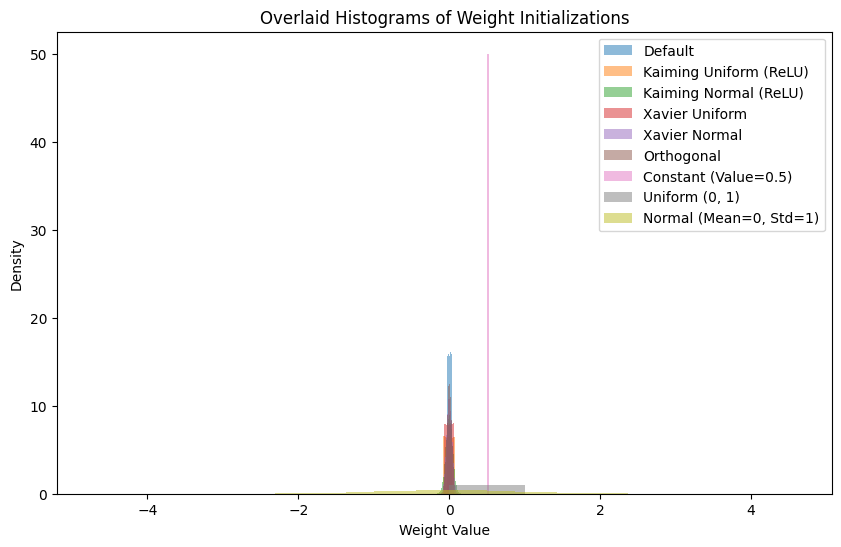

In [8]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt


# Function to create a new layer and apply initialization
def initialize_and_view(init_function, **kwargs):
    layer = nn.Linear(1000, 500)  # Create a new layer for each initialization
    init_function(layer.weight, **kwargs)
    if layer.bias is not None:
        init.zeros_(layer.bias)  # Reset bias to zero for consistency
    return layer.weight.detach().numpy()


# Apply and store initializations
initializations = {
    "Default": nn.Linear(1000, 500).weight.detach().numpy(),
    "Kaiming Uniform (ReLU)": initialize_and_view(
        init.kaiming_uniform_, nonlinearity="relu"
    ),
    "Kaiming Normal (ReLU)": initialize_and_view(
        init.kaiming_normal_, nonlinearity="relu"
    ),
    "Xavier Uniform": initialize_and_view(init.xavier_uniform_),
    "Xavier Normal": initialize_and_view(init.xavier_normal_),
    "Orthogonal": initialize_and_view(init.orthogonal_),
    "Constant (Value=0.5)": initialize_and_view(init.constant_, val=0.5),
    "Uniform (0, 1)": initialize_and_view(init.uniform_, a=0, b=1),
    "Normal (Mean=0, Std=1)": initialize_and_view(init.normal_, mean=0, std=1),
}

# Print weight statistics for debugging
for name, weights in initializations.items():
    print(f"{name}:")
    print(
        f"  Mean: {weights.mean():.6f}, Std: {weights.std():.6f}, Min: {weights.min():.6f}, Max: {weights.max():.6f}\n"
    )

# Overlay histograms of weight initializations
plt.figure(figsize=(10, 6))
for name, weights in initializations.items():
    plt.hist(weights.flatten(), bins=50, alpha=0.5, label=name, density=True)
plt.title("Overlaid Histograms of Weight Initializations")
plt.xlabel("Weight Value")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
import torch
import datetime
import time
import numpy as np

if __name__ == "__main__":
    print("strat")
    all_feature = []
    np_featyre = []
    for i in range(30000):
        tesnor_ = torch.rand(4, 256, 62)
        all_feature.append(tesnor_)
        np_featyre.append(tesnor_.numpy())

    start = time.time()
    all_np_feature = np.concatenate(np_featyre, 0)
    print(f"{time.time() - start} s")

    start = time.time()
    all_feature = torch.cat(all_feature, dim=0)
    print(f"{time.time() - start} s")

strat
